In [16]:
import corner
import numpy as np

In [17]:
import pandas as pd

In [18]:
che = pd.read_csv("HeDataSgrASMring2wfVACP/Chain/nested_chain_scan-2.csv")
che = che[["diam","fwhm","τ","ξτ", "ma1", "mp1", "ma2", "mp2", "floor"]]
cfr = pd.read_csv("SgrASMring2wfVACP/Chain/nested_chain_scan-230.csv")
cfr = cfr[["diam","fwhm","τ","ξτ", "ma1", "mp1", "ma2", "mp2", "floor"]]


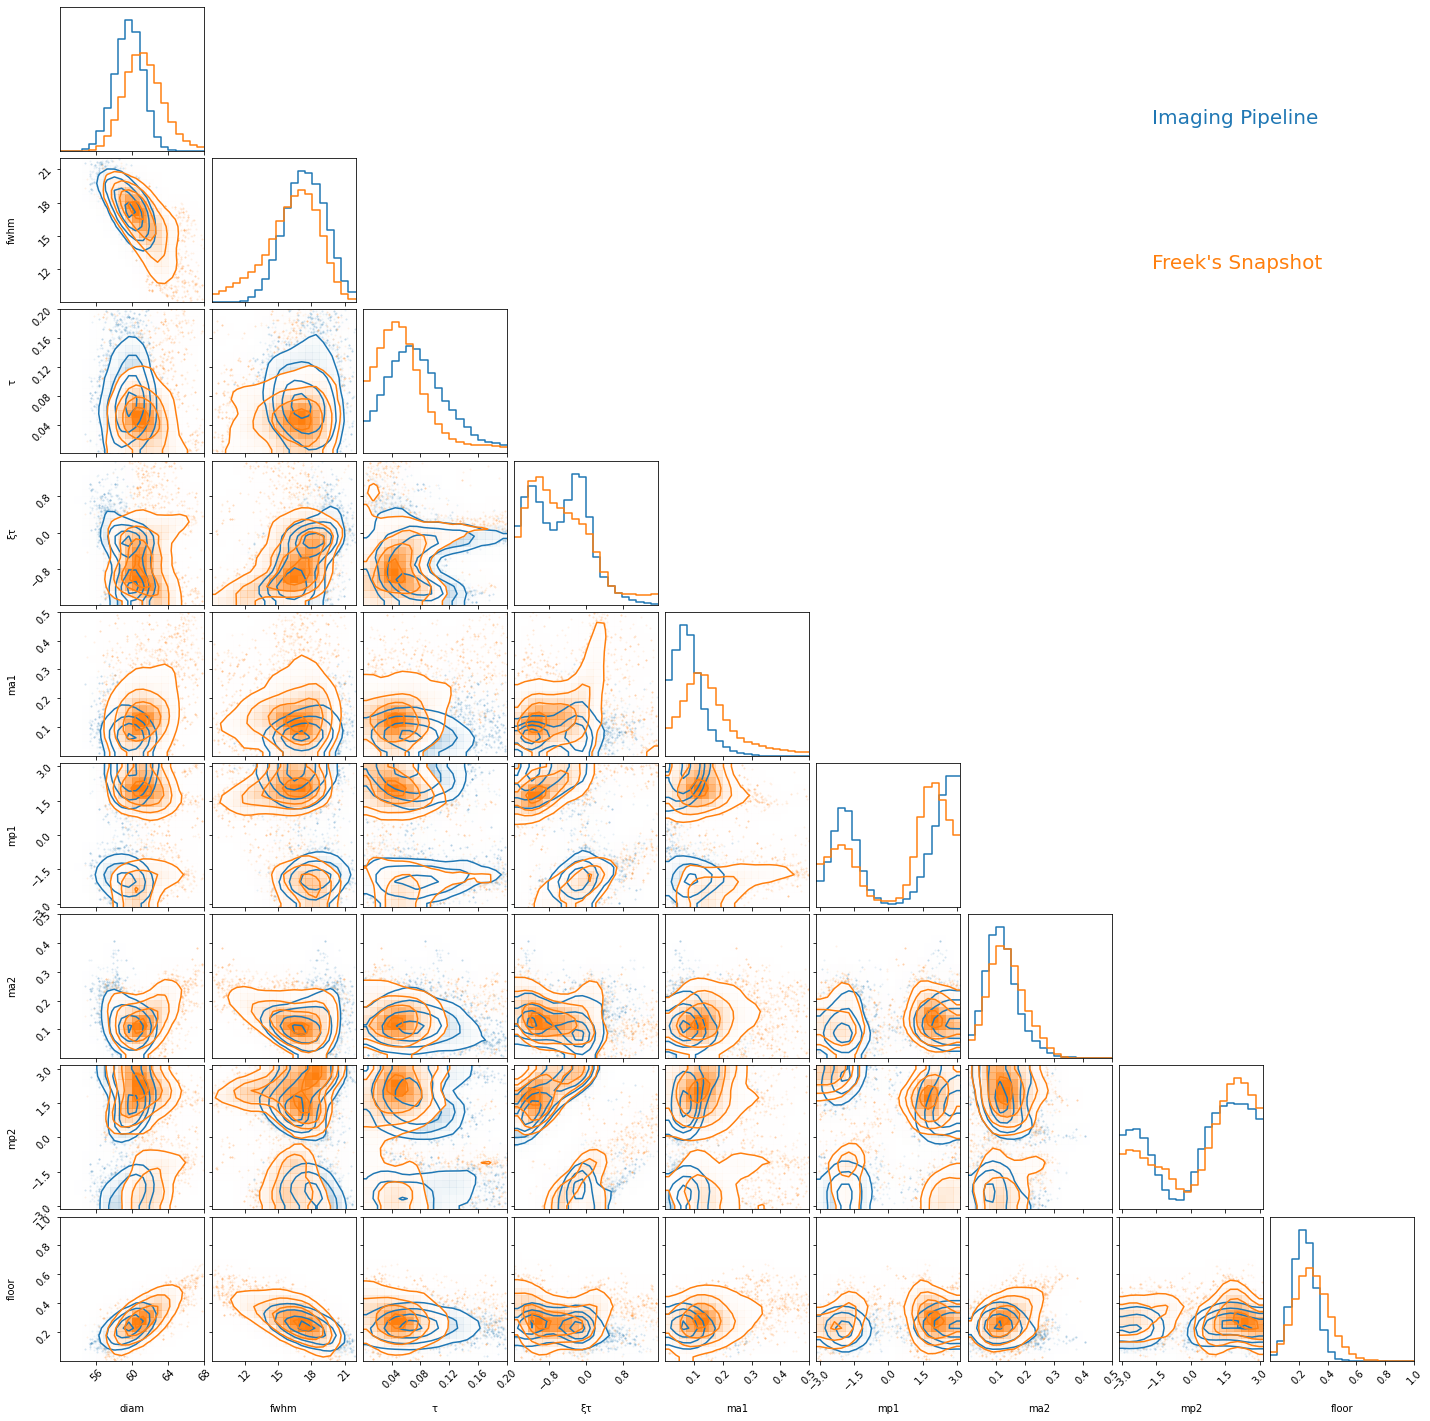

In [25]:
ranges = [(52,68), (9,22),(0.0,0.2), (-np.pi/2,np.pi/2), (0.0, 0.5), (-np.pi,np.pi), (0.0, 0.5),(-np.pi,np.pi), (0.0, 1.0)]
fig = corner.corner(che, weights=np.ones(che.shape[0])/che.shape[0], range=ranges, bins=20, labels=che.keys(), color="C0", smooth=(1.0,1.0), smooth1d=1.0)
corner.corner(cfr,weights=np.ones(cfr.shape[0])/cfr.shape[0], range=ranges, bins=20, labels=cfr.keys(), color="C1", smooth=(1.0,1.0), smooth1d=1.0, fig=fig)
fig.text(0.8,0.9, "Imaging Pipeline", color="C0", fontsize=20)
fig.text(0.8,0.8, "Freek's Snapshot", color="C1", fontsize=20)
fig.savefig("pipelinecomp.pdf")

In [54]:
he = np.load("DPI_mring2floor_3599_samples.npy", allow_pickle=True).item()
dpi = pd.DataFrame({"diam": he["diameter"][2], 
                    "fwhm": he["width"][2], 
                    "ma1": he["asymmetry1"][2],
                    "mp1": -he["pa1"][2]*np.pi/180.0,
                    "ma2": he["asymmetry2"][2],
                    "mp2": -he["pa2"][2]*np.pi/180.0, 
                    "floor": he["floor"][2]})

In [62]:
he["time"][2]

12.641666666662786

In [63]:
pd.read_csv("HeDataSgrAMring2wfVACP/Stats/summary_stats-2.csv")

,time,rchi2,rampchi2,rcpchi2,mampchi2,mcpchi2,logz,logzerr,AA,AP,...,SM,SP,f,floor,diam,ma1,mp1,ma2,mp2,fwhm
0,12.64,0.794044,1.448345,0.883915,0.413813,0.681878,13.684225,0.310179,1.049735,1.048881,...,1.115836,0.941779,0.913393,0.235262,59.462376,0.087664,-2.030022,0.06913,-2.936023,17.990746


In [60]:
rose = pd.read_csv("HeDataSgrAMring2wfVACP/Chain/nested_chain_scan-2.csv")
rose["diamdb"] = rose.diam - 1/(4*np.log(2))*rose.fwhm**2/rose.diam
rose = rose[["diamdb","fwhm", "ma1", "mp1", "ma2", "mp2", "floor"]]

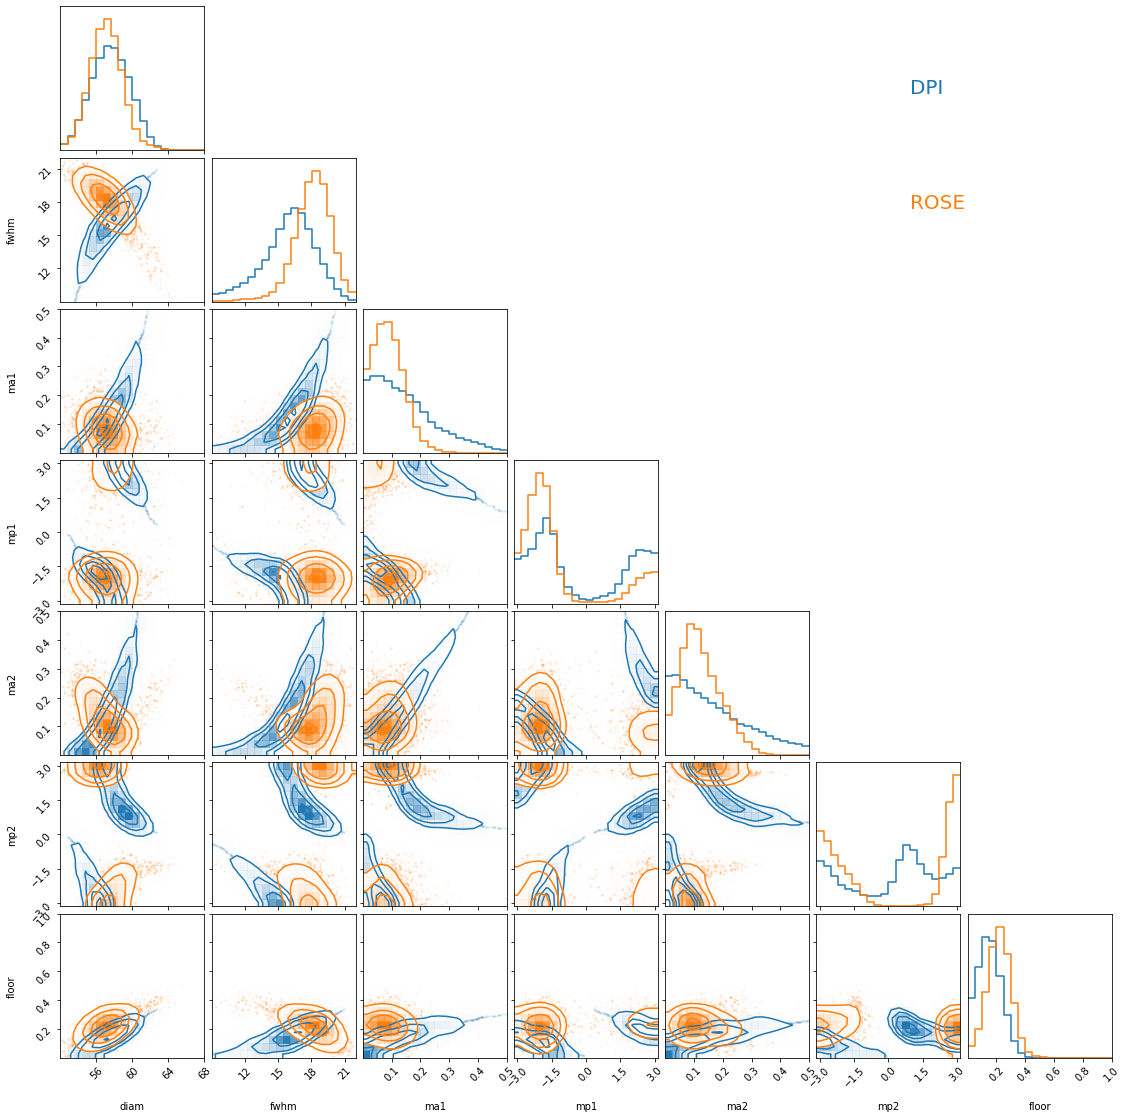

In [61]:
ranges = [(52,68), (9,22), (0.0, 0.5), (-np.pi,np.pi), (0.0, 0.5),(-np.pi,np.pi), (0.0, 1.0)]
fig = corner.corner(dpi, weights=np.ones(dpi.shape[0])/dpi.shape[0], range=ranges, bins=20, labels=dpi.keys(), color="C0", smooth=(1.0,1.0), smooth1d=1.0)
corner.corner(rose,weights=np.ones(rose.shape[0])/rose.shape[0], range=ranges, bins=20, labels=dpi.keys(), color="C1", smooth=(1.0,1.0), smooth1d=1.0, fig=fig)
fig.text(0.8,0.9, "DPI", color="C0", fontsize=20)
fig.text(0.8,0.8, "ROSE", color="C1", fontsize=20)
fig.savefig("dpi_rose.pdf")